<div class="output_png output_subarea output_execute_result">
<center>
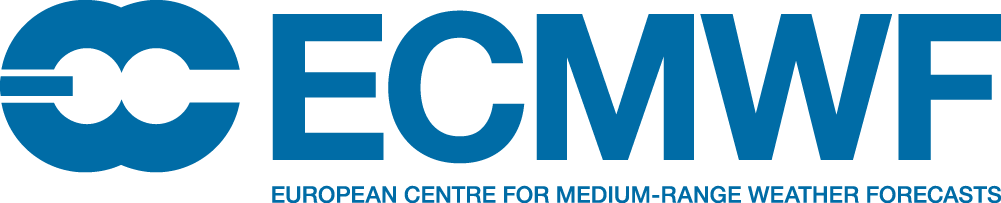</center>
</div>

# 	Ensemble mean and spread for Mean sea level pressure

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-mslp-mean-spread

Access to ECMWF Open data is governed by the following [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).    

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 1 parameter:

* [Mean sea level pressure](https://apps.ecmwf.int/codes/grib/param-db/?id=151)

In this example, we will use: 
- **ecmwf.opendata** Client to download the data
- **ecmwf.data** library to read and process the data (calculate the speed and probabilities)
- **ecmwf.geomaps** to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> Skip this cell if you already have these libraries installed
</div>

In [ ]:
import sys
!{sys.executable} -m pip install ecmwf-data ecmwf-opendata git+https://github.com/ecmwf/ecmwf-geomaps.git

In [3]:
import ecmwf.data as ecdata
from ecmwf.geomaps import GeoMap
from ecmwf.opendata import Client

In [4]:
client = Client("https://ai4edataeuwest.blob.core.windows.net/ecmwf", beta=True)

For the Mean sea level pressure, ensemble mean and spread are available for download.  

Ensemble mean and ensemble spread have different **type** in the request.  
One data request can have only one type, so we need to have two requests to download this datasets.

In [5]:
parameters = ['msl']
em_filename = 'medium-mslp-mean-spread_em.grib'
es_filename = 'medium-mslp-mean-spread_es.grib'
em_filename

'medium-mslp-mean-spread_em.grib'

In [6]:
client.retrieve(
    date=-2,
    time=0,
    step=120,
    stream="enfo",
    type="em",
    levtype="sfc",
    param=parameters,
    target=em_filename
)

In [33]:
client.retrieve(
    date=-2,
    time=0,
    step=120,
    stream="enfo",
    type="es",
    levtype="sfc",
    param=parameters,
    target=es_filename
)

## Reading and processing the data
Now we can use **ecmwf.data** to read the file.

In [9]:
msl_em = ecdata.read(em_filename)

In [34]:
msl_es = ecdata.read(es_filename)

The **describe()** function will give us the overview of the dataset.  

In [11]:
msl_em.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
msl,meanSea,0,20220103,0,120,None,151,od,enfo,em,0001


In [13]:
msl_es.describe('msl')

shortName,msl
name,Mean sea level pressure
paramId,151
units,Pa
typeOfLevel,meanSea
level,0
date,20220103
time,0
step,120
number,None
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [14]:
msl_es.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,msl,meanSea,0,20220103,0,120,em,None,regular_ll


And finally, we can plot the data on the map. 

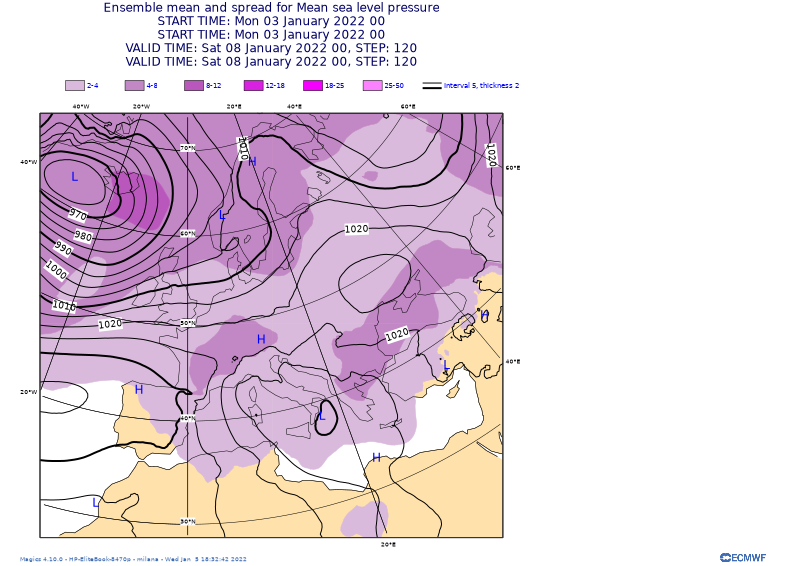

In [35]:
fig = GeoMap(area_name='europe', preset='background-foreground')

fig.contour_lines(msl_es, preset="sh_blu_f02t50")
fig.contour_lines(msl_em, preset="ct_blk_i5_t2_web")

fig.title(["Ensemble mean and spread for Mean sea level pressure", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' />", 
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' />, STEP: <grib_info key='step' />"])

fig.show()